In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '${:,.2f}'.format

In [3]:
df = pd.read_csv('../data/Past Trades.csv')
df = df.iloc[:,:15]
df = df.loc[df.Exc != 'Hiatus']
df = df.loc[~pd.isna(df['Buy date'])].reset_index(drop=True)
currency_cols = [i for i in df.columns if 'price' in i.lower() or 'profit' in i.lower() or 'amount' in i.lower()]
df['Buy date'] = pd.to_datetime(df['Buy date'], format='%d %b %y')
df['Sell date'] = pd.to_datetime(df['Sell date'], format='%d %b %y')
df['Buy date'] = pd.to_datetime(df['Buy date'], format='%d %b %y')
df['Sell date'] = pd.to_datetime(df['Sell date'], format='%d %b %y')
df[currency_cols] = df[currency_cols].replace('[$,]', '', regex=True).astype(float)

In [4]:
buy_df = df.copy().drop(columns=['Sell date']).rename(columns={'Buy date': 'Date'})
sell_df = df.copy().drop(columns=['Buy date']).rename(columns={'Sell date': 'Date'}).sort_values(by='Date').dropna(subset=['Date'])
buy_df['Action'] = 1
sell_df['Action'] = -1
combined_df = pd.concat([buy_df,sell_df]).sort_values(by='Date').reset_index(drop=True)

In [5]:
net_value_invested, net_value_dates = [], []
for index, row in combined_df.iterrows():
    if index == 0:
        net_value_invested.append(row['Buy amount'])
        net_value_dates.append(row['Date'])
    elif row['Date'] == net_value_dates[-1]:
        net_value_invested[-1] = net_value_invested[-1] + row['Buy amount']*row['Action']
    else:
        net_value_invested.append(net_value_invested[-1] + row['Buy amount']*row['Action'])
        net_value_dates.append(row['Date'])

net_profit, net_profit_dates = [], []
for index, row in sell_df.iterrows():
    if index == 0:
        net_profit.append(row['True Profit'])
        net_profit_dates.append(row['Date'])
    elif row['Date'] == net_profit_dates[-1]:
        net_profit[-1] = net_profit[-1] + row['True Profit']
    else:
        net_profit.append(net_profit[-1] + row['True Profit'])
        net_profit_dates.append(row['Date'])

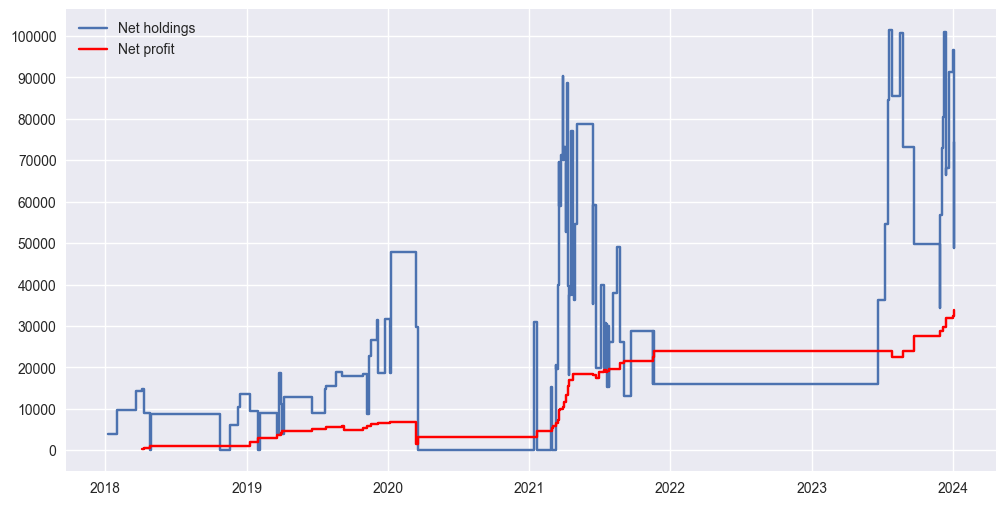

In [6]:
plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8')
plt.step(net_value_dates, net_value_invested, label='Net holdings', where='post')
plt.step(net_profit_dates, net_profit, label='Net profit', where='post', color='red')
plt.yticks(range(0,100100,10000))
plt.legend()
plt.grid(True)
plt.show()